# 데이터 처리 및 시각화

In [1]:
import pandas as pd
import numpy as np
from matplotlib import font_manager
import matplotlib
import matplotlib.pyplot as plt

In [2]:
font_loc = '/Library/fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
df = pd.read_excel('./temp/2012MonthlyTypeAccident.xlsx')
typeList = [u'차대사람',u'차대차',u'차량단독',u'철길건널목']
columnList = [u'차대사람사망자수',u'차대차사망자수',u'차량단독사망자수',u'철길건널목사망자수']

In [4]:
results = pd.DataFrame()
results['test'] = ' '  
for f in range(len(typeList)):
    data=df[(df[u'사고유형_대분류']==typeList[f]) & (df[u'월']==u'사망자수')].iloc[:,4:].sum()
    data.name=columnList[f]
    data.to_frame()
    results=results.merge(data, how='outer',left_index=True, right_index=True)
results['test'] = ' '

In [5]:
results

,test,차대사람사망자수,차대차사망자수,차량단독사망자수,철길건널목사망자수
1월,,176,140,101,1
2월,,153,146,94,0
3월,,168,148,87,0
4월,,158,202,121,2
5월,,136,206,102,0
6월,,134,209,133,0
7월,,146,164,106,0
8월,,129,186,94,0
9월,,175,199,112,0
10월,,212,218,103,0


[Text(0, 0, '1월'),
 Text(0, 0, '2월'),
 Text(0, 0, '3월'),
 Text(0, 0, '4월'),
 Text(0, 0, '5월'),
 Text(0, 0, '6월'),
 Text(0, 0, '7월'),
 Text(0, 0, '8월'),
 Text(0, 0, '9월'),
 Text(0, 0, '10월'),
 Text(0, 0, '11월'),
 Text(0, 0, '12월')]

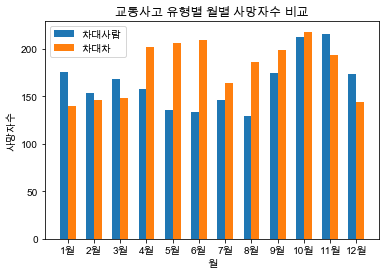

In [14]:
fig , ax= plt.subplots()
index = np.arange(results[u'차대사람사망자수'].shape[0])
ax.bar(index-0.15, results['차대사람사망자수'], width=0.3, label=u'차대사람')
ax.bar(index+0.15, results['차대차사망자수'], width=0.3, label=u'차대차')
ax.set_title(u'교통사고 유형별 월별 사망자수 비교')
ax.set_xlabel(u'월')
ax.set_ylabel(u'사망자수')
ax.legend()
ax.set_xticks(index)
ax.set_xticklabels(results.index)

In [15]:
ax.figure.savefig('./fig.png', dpi=1000)

In [16]:
index = np.arange(results[u'차대사람사망자수'].shape[0])

In [17]:
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
